In [1]:
!pip install klib
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import missingno as msno
import klib
from sklearn.impute import KNNImputer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 9.0 MB/s 
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
X = pd.read_csv('/content/drive/MyDrive/1 семестр/Машинное обучение в прикладных задачах анализа данных/Симакин С.Е./5 Скоринг/cs-training.csv')
y = pd.read_csv('/content/drive/MyDrive/1 семестр/Машинное обучение в прикладных задачах анализа данных/Симакин С.Е./5 Скоринг/sampleEntry.csv')

In [4]:
X.shape

(150000, 12)

In [5]:
X.rename(columns={'Unnamed: 0':'Id'}, inplace=True)

In [6]:
X.head()

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


GridSpec(6, 6)

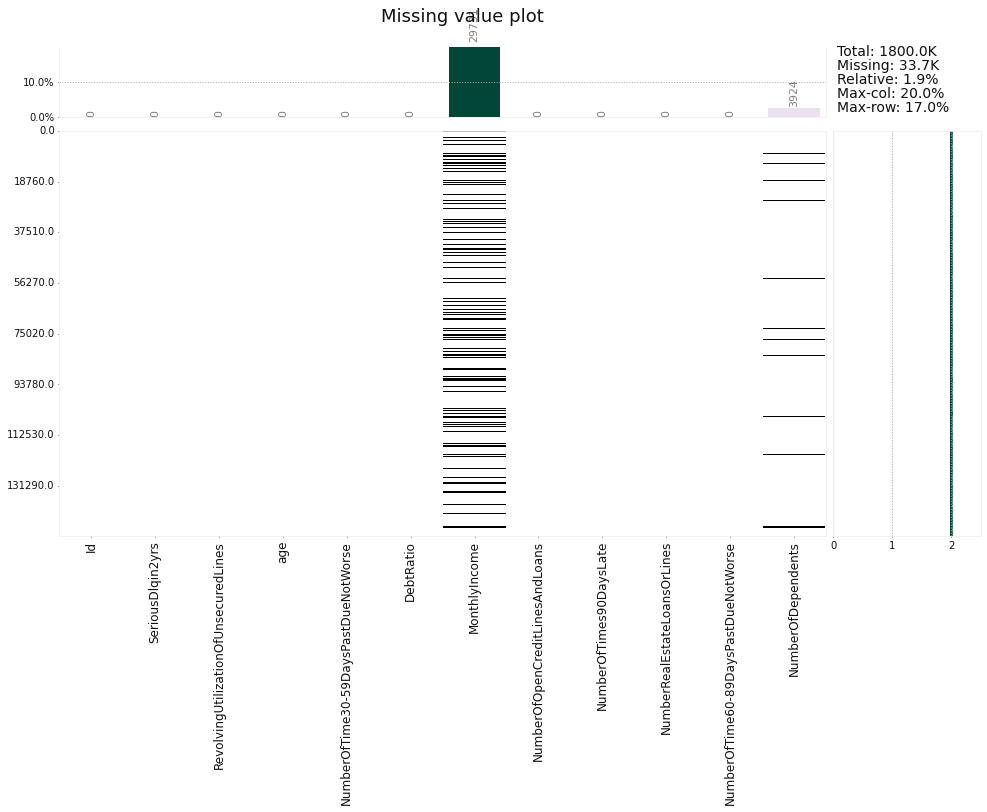

In [7]:
klib.missingval_plot(X, figsize=(16,9))

In [8]:
data = X.merge(y, on='Id')
data.shape

(101503, 13)

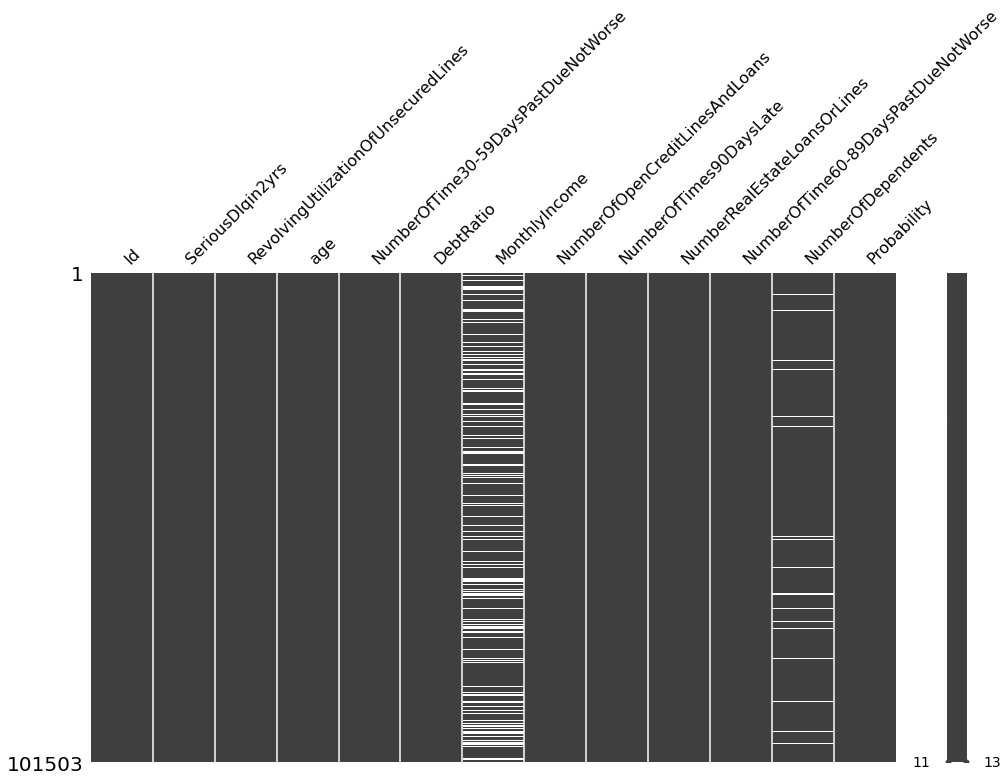

In [9]:
msno.matrix(data, figsize=(16,9))

In [10]:
knn_imputer = KNNImputer(n_neighbors=5)
data = knn_imputer.fit_transform(data)

In [11]:
data = pd.DataFrame(data, columns=['Id', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',	'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',	'NumberRealEstateLoansOrLines',	'NumberOfTime60-89DaysPastDueNotWorse',	'NumberOfDependents', 'Probability'])
data.head()

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Probability
0,1.0,1.0,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0,0.080807
1,2.0,0.0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0,0.040719
2,3.0,0.0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0,0.011968
3,4.0,0.0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0,0.067640
4,5.0,0.0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0,0.108264


In [12]:
data.shape

(101503, 13)

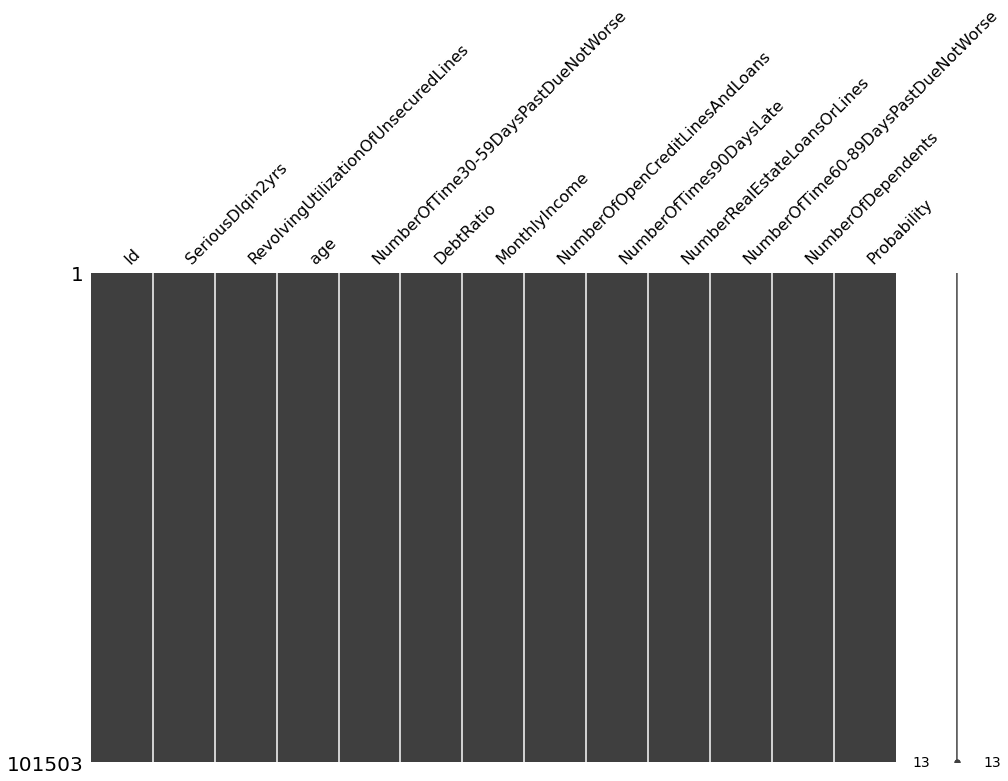

In [13]:
msno.matrix(data, figsize=(16,9))

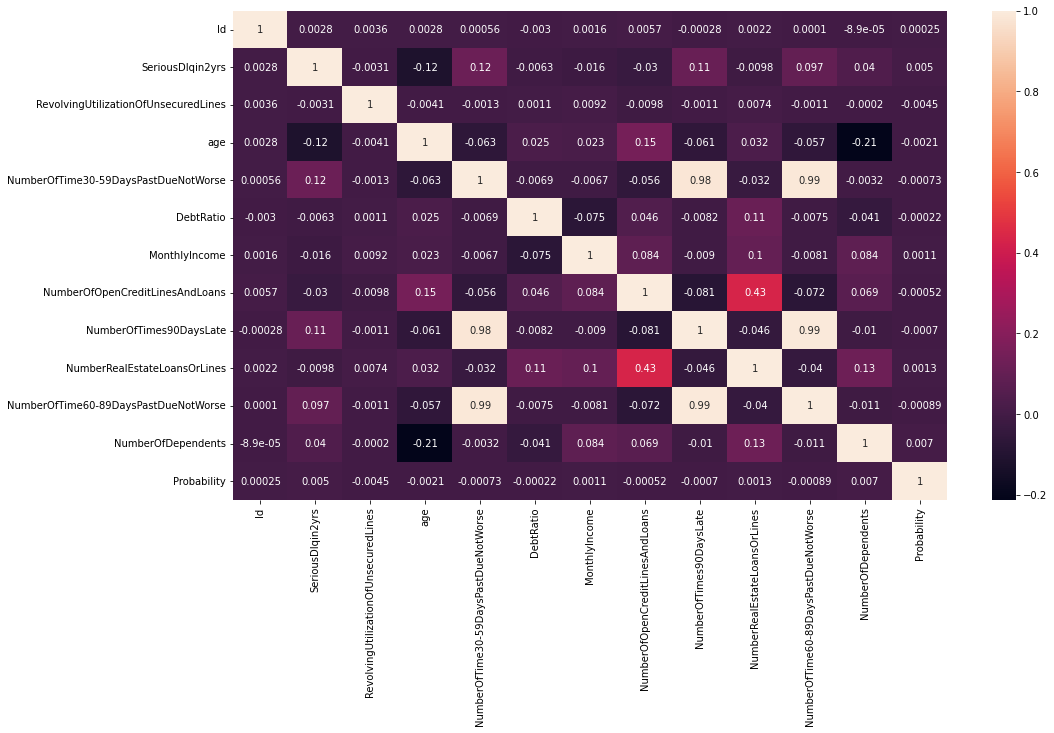

In [ ]:
fig = plt.figure(figsize=(16,9))
ax = sn.heatmap(data.corr(), annot=True)

In [ ]:
data.isna().sum()

Id                                      0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
Probability                             0
dtype: int64

In [ ]:
data.drop(columns=['SeriousDlqin2yrs'], axis=1, inplace=True) # т.к. в test_X этот столбец пустой

In [ ]:
data.shape

(101503, 12)

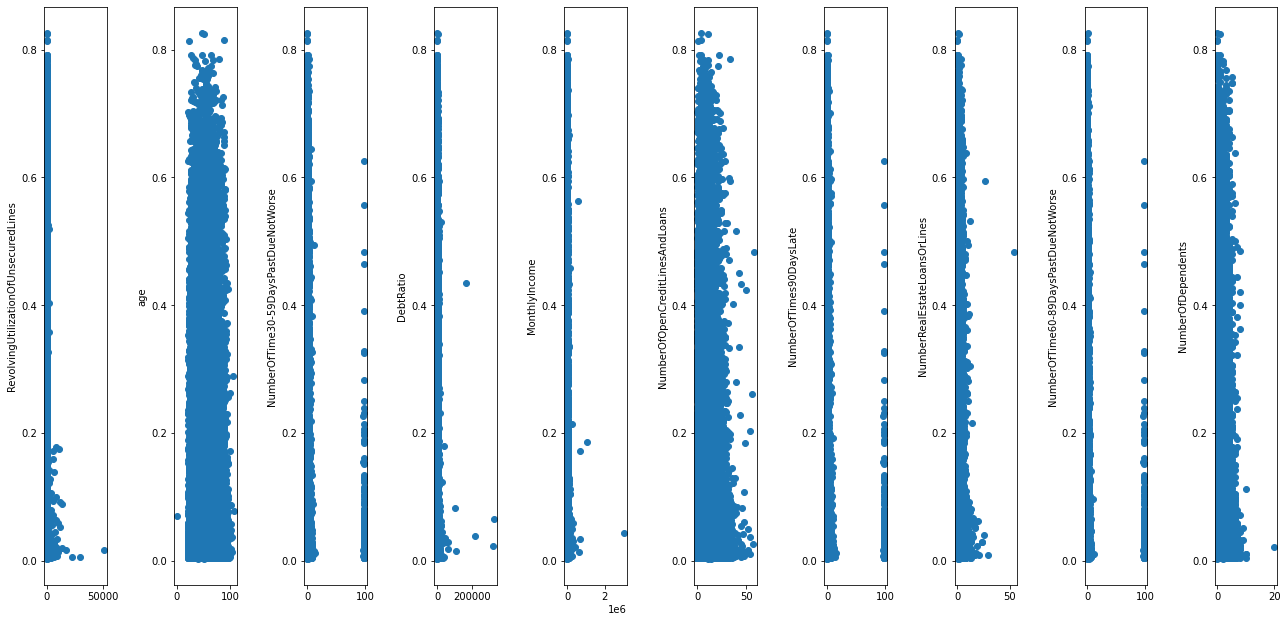

In [ ]:
fig = plt.figure(figsize=(20,9))
for i in range(1, 11):
  ax = fig.add_subplot(1,11,i)
  ax.scatter(data.iloc[:,i], data.iloc[:,11])
  ax.set_ylabel(data.columns[i])
fig.tight_layout(pad=2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data.iloc[:, 1:11] = scaler.fit_transform(data.iloc[:, 1:11])
data.head()

,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Probability
0,1.0,0.000015,0.420561,0.020408,2.435759e-06,0.003031,0.224138,0.000000,0.111111,0.0,0.10,0.080807
1,2.0,0.000019,0.373832,0.000000,3.696982e-07,0.000864,0.068966,0.000000,0.000000,0.0,0.05,0.040719
2,3.0,0.000013,0.355140,0.010204,2.581822e-07,0.001011,0.034483,0.010204,0.000000,0.0,0.00,0.011968
3,4.0,0.000005,0.280374,0.000000,1.093528e-07,0.001097,0.086207,0.000000,0.000000,0.0,0.00,0.067640
4,5.0,0.000018,0.457944,0.010204,7.560939e-08,0.021134,0.120690,0.000000,0.018519,0.0,0.00,0.108264


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:11], data.iloc[:, 11])
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

0.0271646964557339

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor() # отработал хуже, чем обычное дерево
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
mean_squared_error(y_test, y_pred)

0.013315822515570853

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model2 = KNeighborsRegressor()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
mean_squared_error(y_test, y_pred)

0.014927963237858603

In [ ]:
test_X = pd.read_csv('/content/drive/MyDrive/1 семестр/Машинное обучение в прикладных задачах анализа данных/Симакин С.Е./5 Скоринг/cs-test.csv')

In [ ]:
test_X.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [ ]:
test_X.drop(columns=['Unnamed: 0', 'SeriousDlqin2yrs'], axis=1, inplace=True)
test_X.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [ ]:
test_X.shape

(101503, 10)

GridSpec(6, 6)

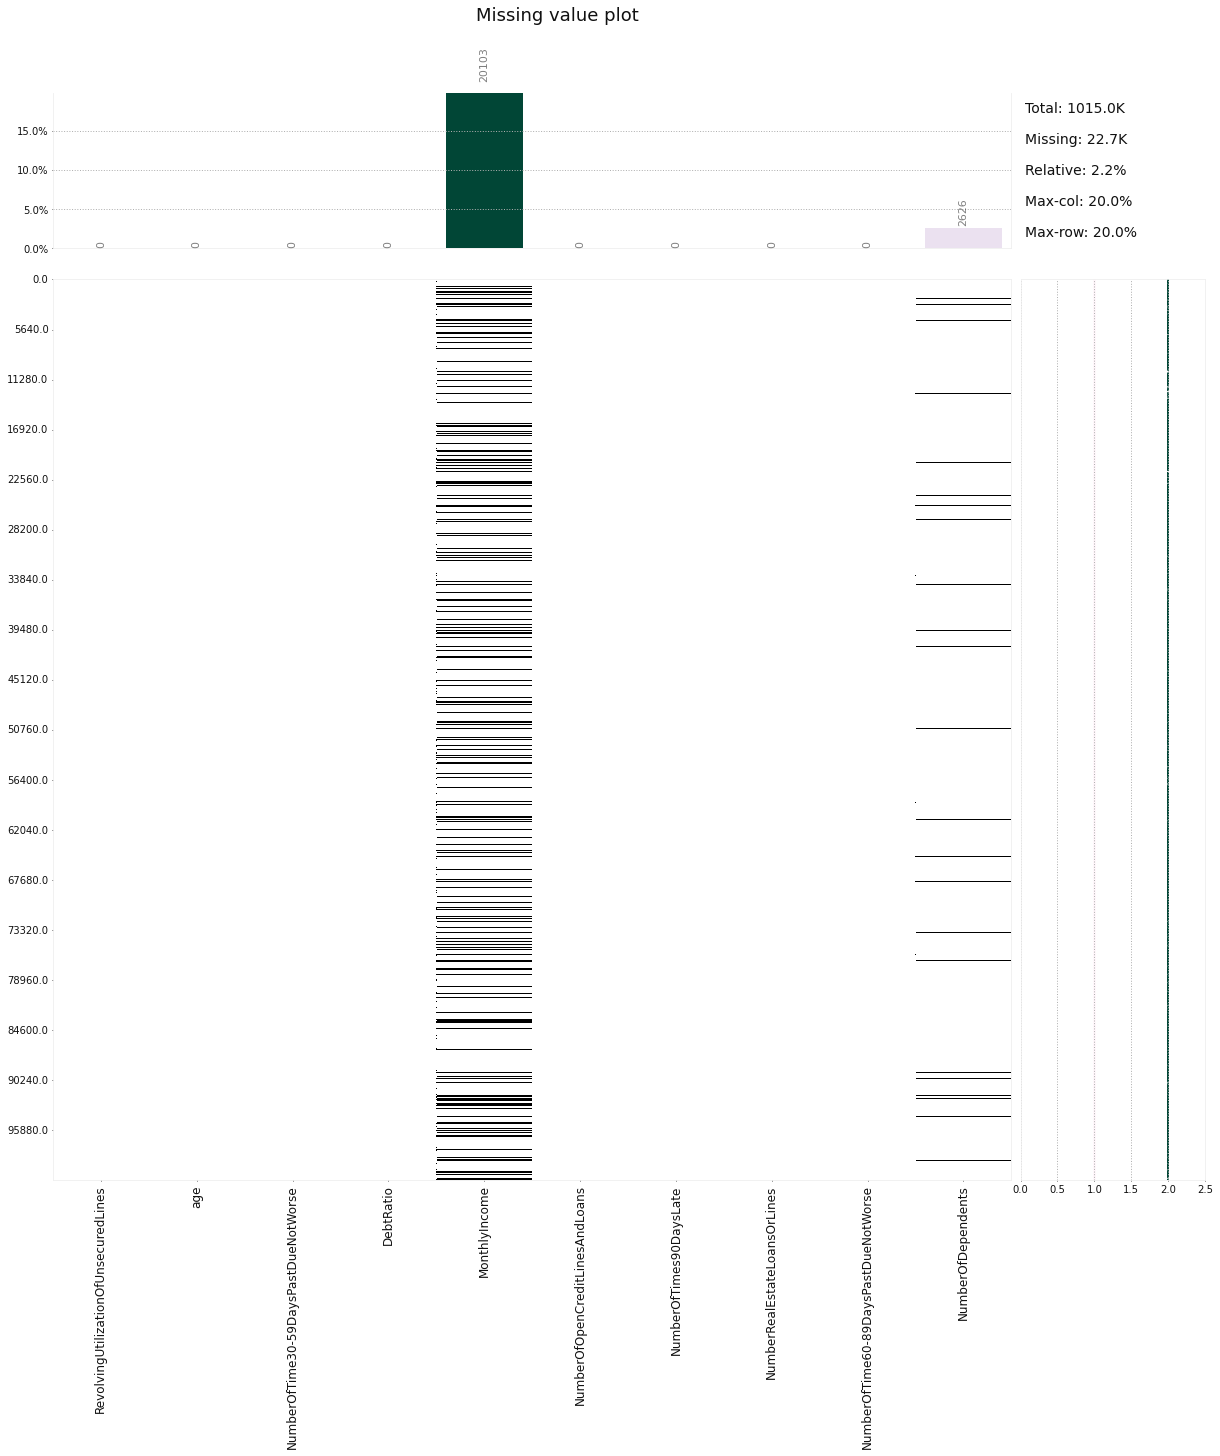

In [ ]:
klib.missingval_plot(test_X)

In [ ]:
test_X = pd.DataFrame(knn_imputer.fit_transform(test_X), columns=test_X.columns)

In [ ]:
test_X.isna().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [ ]:
final_prediction = model2.predict(test_X)

In [ ]:
Id = range(1, test_X.shape[0]+1)
submit_df = pd.DataFrame(zip(Id, final_prediction), columns=['Id', 'Probability'])
submit_df.head()

,Id,Probability
0,1,0.165399
1,2,0.165399
2,3,0.165399
3,4,0.165399
4,5,0.165399


In [ ]:
submit_df.shape

(101503, 2)

In [ ]:
# submit_df.to_csv('/content/drive/MyDrive/1 семестр/Машинное обучение в прикладных задачах анализа данных/Симакин С.Е./5 Скоринг/submit_df.csv', index=False)